In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.patches as mpatches


In [ ]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:

x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width',
                                     'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Target  150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [ ]:
df = pd.DataFrame(x)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled_df = pd.DataFrame(x_scaled, columns=iris.feature_names)
display(x_scaled_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


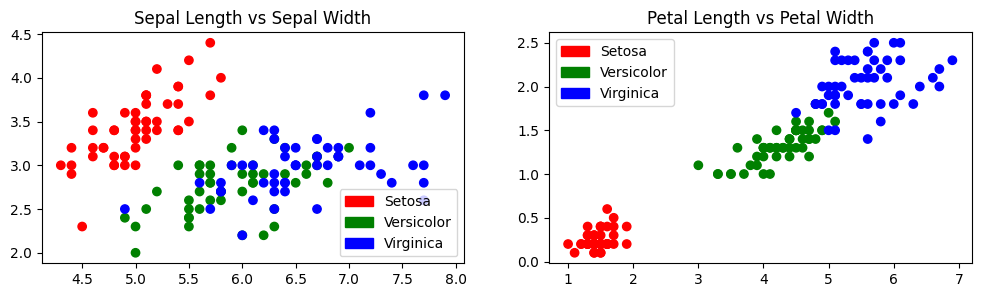

In [ ]:
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

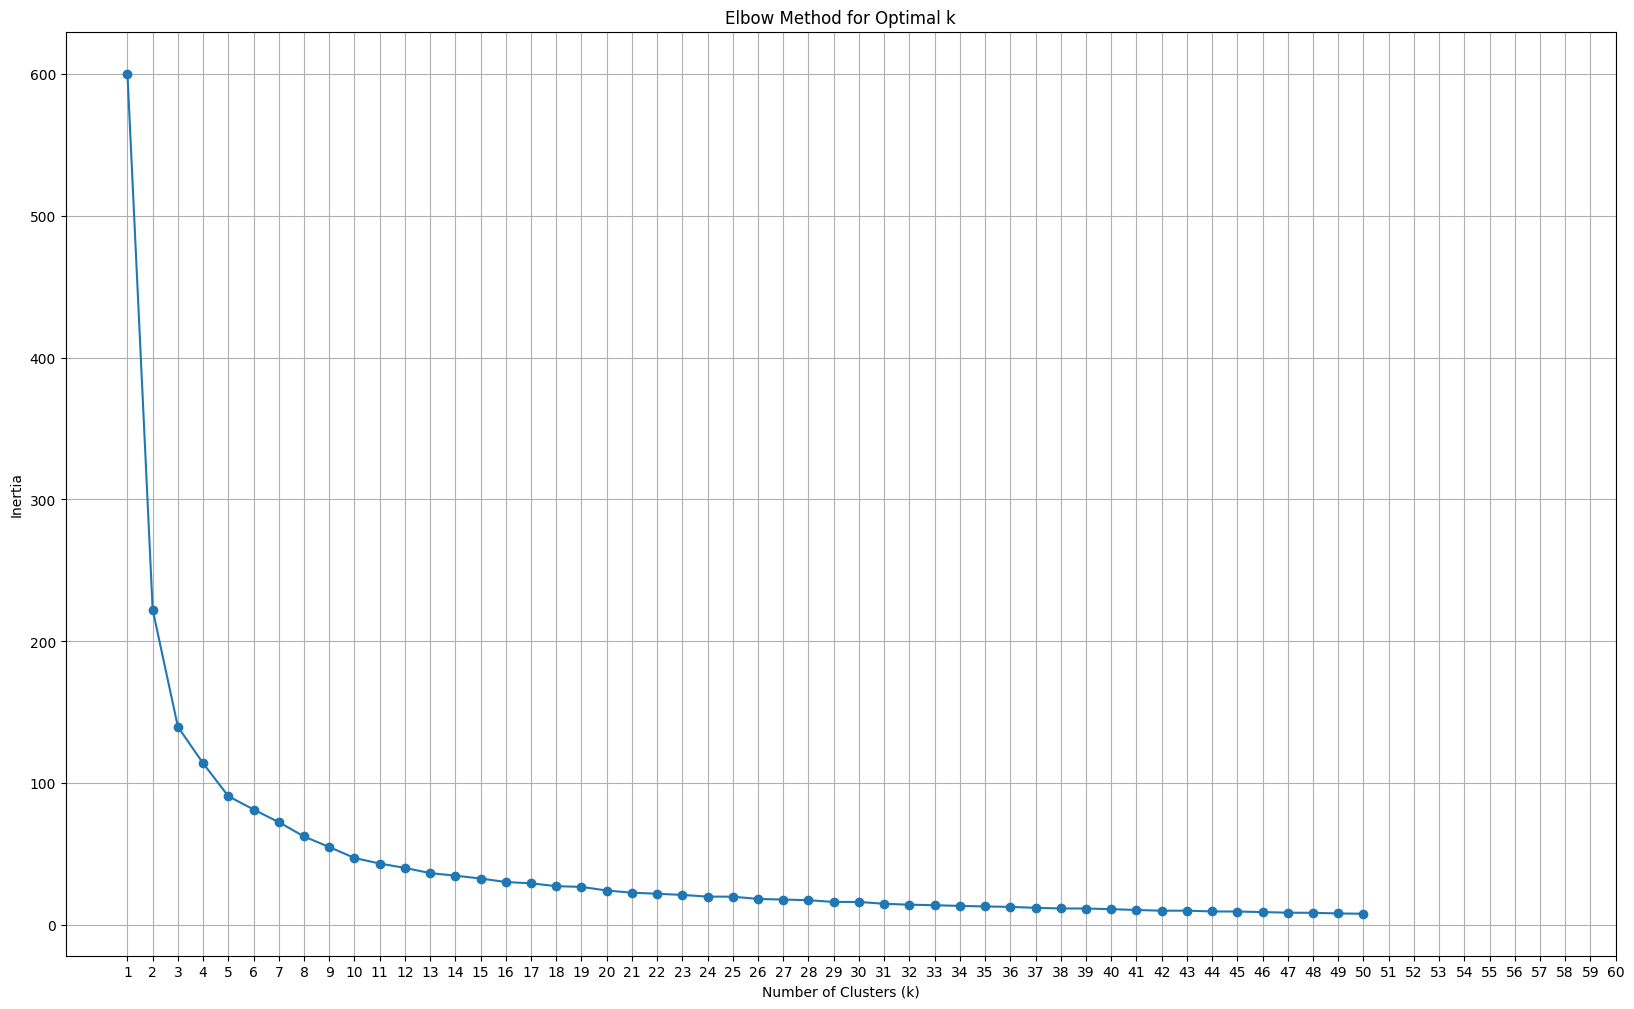

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 51):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 12))
plt.plot(range(1, 51), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 61))
plt.grid(True)
plt.show()

## K-means clustering

### Subtask:
Apply K-Means


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(x_scaled_df)
kmeans_labels = kmeans.labels_

In [ ]:
kmeans_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

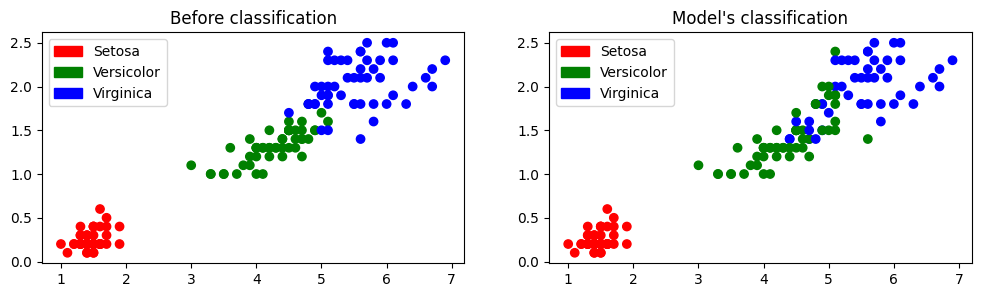

In [ ]:
plt.figure(figsize=(12,3))

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(kmeans.labels_, [1,0,2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

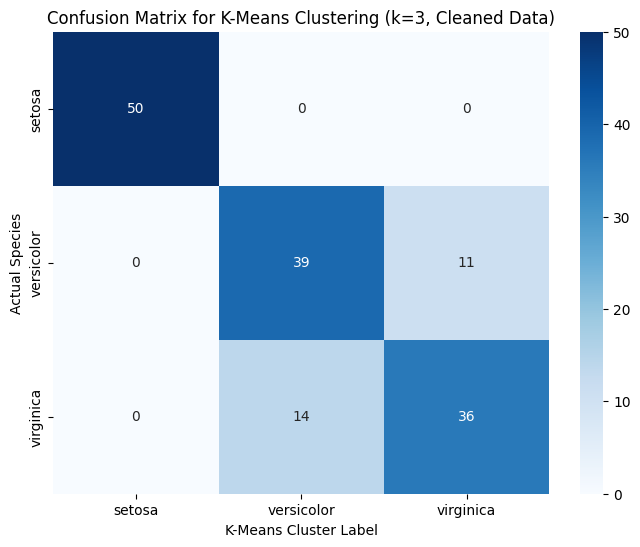

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_cleaned_kmeans = confusion_matrix(y['Target'], predictedY)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_cleaned_kmeans, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('K-Means Cluster Label')
plt.ylabel('Actual Species')
plt.title('Confusion Matrix for K-Means Clustering (k=3, Cleaned Data)')
plt.show()

## Hierarchical clustering

### Subtask:
Generate Dendrogram


**Reasoning**:
Compute the linkage matrix and generate the dendrogram.



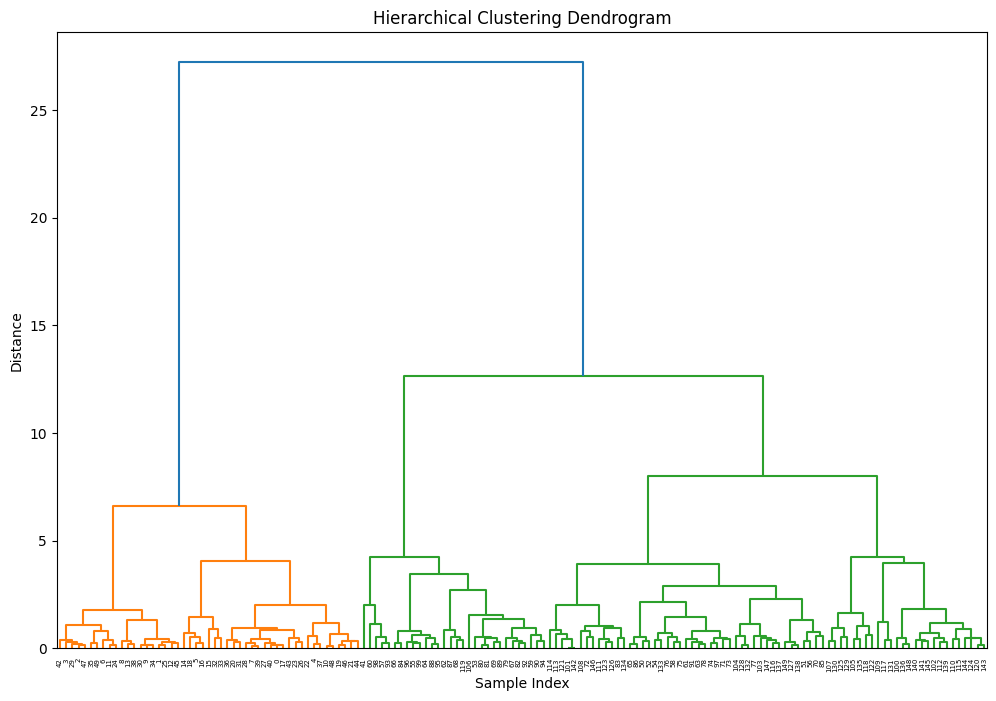

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(x_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## Hierarchical clustering

### Subtask:
Apply Hierarchical Clustering


**Reasoning**:
Instantiate and fit the AgglomerativeClustering model to the scaled data and store the cluster labels.



In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_model = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical_model.fit_predict(x_scaled)

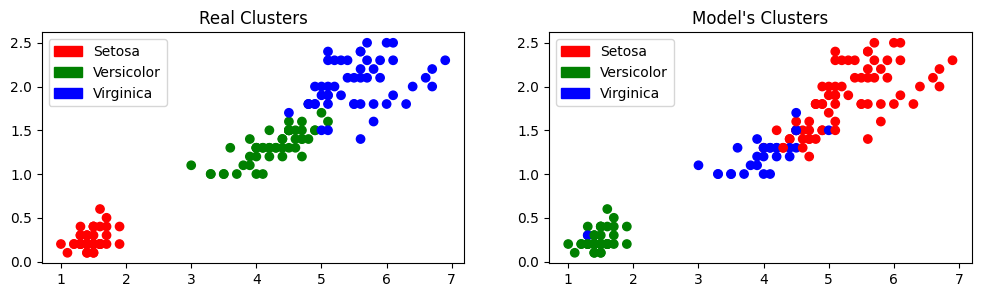

In [ ]:
# prompt: make a image of the models cluster along with the real cluster

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Real Clusters')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[hierarchical_labels])
plt.title("Model's Clusters")
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.show()

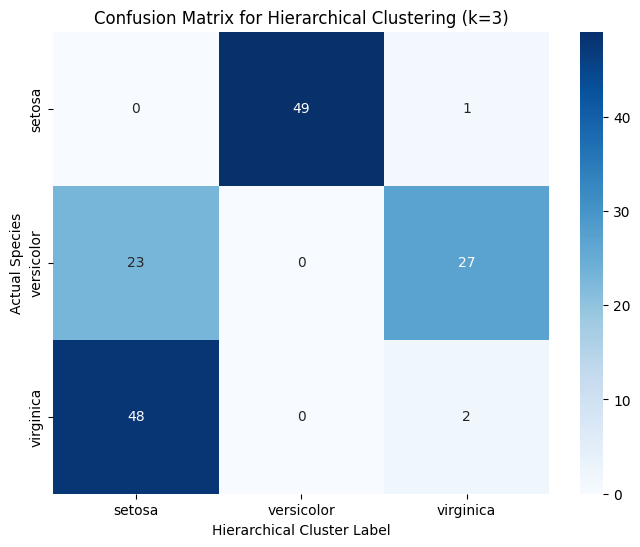

Adjusted Rand Index (ARI) for Hierarchical Clustering: 0.6153


In [ ]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score

# Confusion matrix for Hierarchical Clustering
cm_hierarchical = confusion_matrix(y['Target'], hierarchical_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_hierarchical, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Hierarchical Cluster Label')
plt.ylabel('Actual Species')
plt.title('Confusion Matrix for Hierarchical Clustering (k=3)')
plt.show()

# Adjusted Rand Index (ARI) score
ari_hierarchical = adjusted_rand_score(y['Target'], hierarchical_labels)
print(f"Adjusted Rand Index (ARI) for Hierarchical Clustering: {ari_hierarchical:.4f}")

## Dbscan clustering

### Subtask:
Apply DBSCAN


**Reasoning**:
Import DBSCAN, instantiate the model, and fit it to the scaled data to get the cluster labels.



In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(x_scaled)

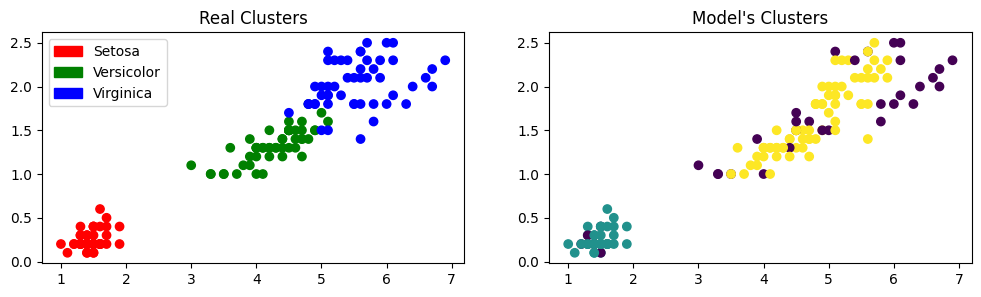

In [ ]:
# prompt: make a models cluster and real cluster image

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Real Clusters')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
# Use a colormap that can handle different labels, including -1
plt.scatter(x['Petal Length'], x['Petal Width'], c=dbscan_labels, cmap='viridis')
plt.title("Model's Clusters")
# The legend will not be accurate with the colormap, so we can remove it or create custom legend handles based on DBSCAN labels if needed
# plt.legend(handles=[red_patch, green_patch, blue_patch])


plt.show()

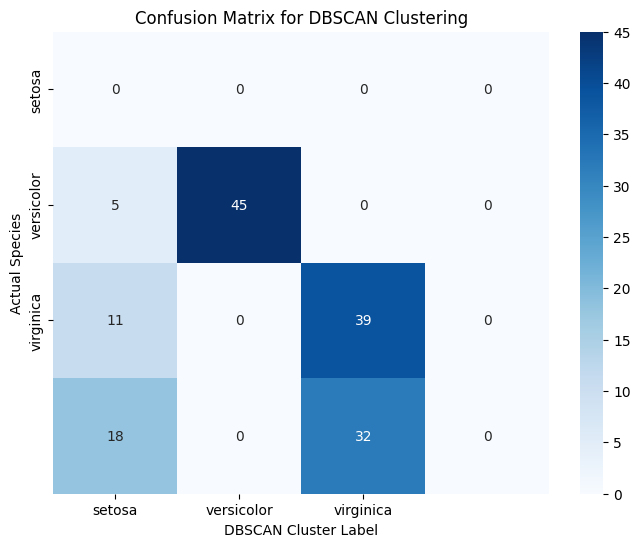

Adjusted Rand Index (ARI) for DBSCAN Clustering: 0.4421


In [ ]:
# prompt: generate an confusion matrix and ari

# Confusion matrix for DBSCAN
cm_dbscan = confusion_matrix(y['Target'], dbscan_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dbscan, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('DBSCAN Cluster Label')
plt.ylabel('Actual Species')
plt.title('Confusion Matrix for DBSCAN Clustering')
plt.show()

# Adjusted Rand Index (ARI) score
ari_dbscan = adjusted_rand_score(y['Target'], dbscan_labels)
print(f"Adjusted Rand Index (ARI) for DBSCAN Clustering: {ari_dbscan:.4f}")